# National Parks Service

Data analysis on the conservation statuses of these species and explore if there are any patterns or themes to the types of species that become endangered. 

### *species_info.csv:* contains data about different species and their conservation status
* `category` - class of animal
* `scientific_name` - the scientific name of each species
* `common_name` - the common names of each species
* `conservation_status` - each species’ current conservation status

### *observations.csv:* holds recorded sightings of different species at several national parks for the past 7 days.
* `scientific_name` - the scientific name of each species
* `park_name` - Park where species were found
* `observations` - the number of times each species was observed at park

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df_obs = pd.read_csv("observations.csv", encoding='utf-8')
df_spe = pd.read_csv("species_info.csv", encoding='utf-8')

-----------------------
## Data analysis - Species file

In [4]:
df_spe.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
print("Total animal category: {}".format(len(df_spe.category.unique())))
print("Category: {}".format(df_spe.category.unique()))
print("Total unique scientific name: {}".format(len(df_spe.scientific_name.unique())))
print("Total unique common names: {}".format(len(df_spe.common_names.unique())))
print("Conservation status: {}".format(df_spe.conservation_status.dropna().unique()))

Total animal category: 7
Category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Total unique scientific name: 5541
Total unique common names: 5504
Conservation status: ['Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Under the [Endangered Species Act (ESA)](https://www.fisheries.noaa.gov/national/endangered-species-conservation/endangered-species-act), plant and animal species may be listed as either *endangered* or *threatened*. *“Endangered”* means a species is in danger of extinction throughout all or a significant portion of its range. *“Threatened”* means a species is likely to become endangered within the foreseeable future.'

-------------------
## Data analysis - Observations file

In [7]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [9]:

print("Total unique scientific name: {}".format(len(df_obs.scientific_name.unique())))
print("Total unique park name: {}".format(len(df_obs.park_name.unique())))
print("Park name: {}".format(df_obs.park_name.unique()))
print("Observation min.: {}".format(df_obs.observations.min()))
print("Observation max.: {}".format(df_obs.observations.max()))
print("Observation mean.: {}".format(round(df_obs.observations.mean())))


Total unique scientific name: 5541
Total unique park name: 4
Park name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Observation min.: 9
Observation max.: 321
Observation mean.: 142


## Distributions

In [108]:
sns.set_style("whitegrid")
sns.set(style="ticks")

In [11]:
df_merge = df_spe.merge(df_obs, 
                        on="scientific_name",
                        how="left"
)
df_merge.dropna(inplace=True)

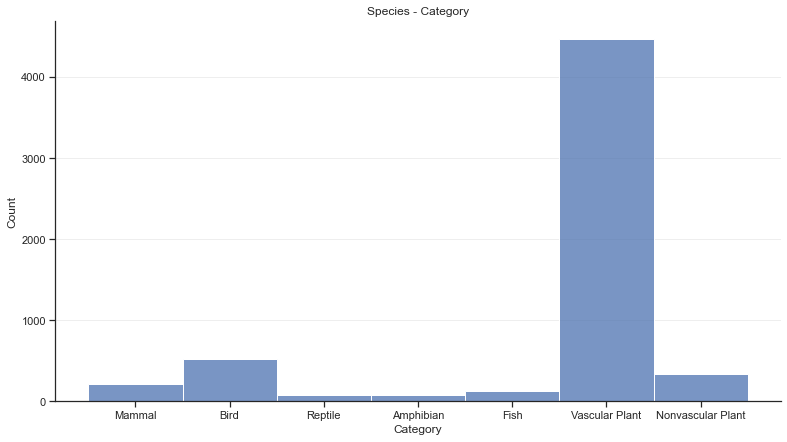

In [12]:
plt.figure(figsize=(13,7))
sns.histplot(data=df_spe, x="category")
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Species - Category")
plt.xlabel("Category")
sns.despine(left=False, bottom=False)
plt.show()

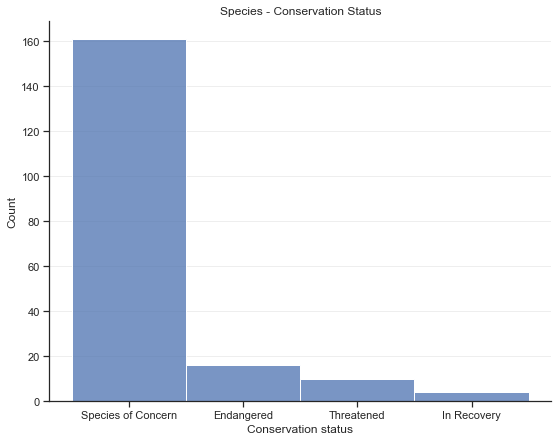

In [13]:
plt.figure(figsize=(9,7))
sns.histplot(data=df_spe.dropna(), x="conservation_status")
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Species - Conservation Status")
plt.xlabel("Conservation status")
sns.despine(left=False, bottom=False)
plt.show()

------------------------------------------------------
## Conservation status

In [14]:
status_conserv = df_spe.groupby(["conservation_status", "category"])\
                    ["scientific_name"]\
                    .count()\
                    .unstack()\
                    .reset_index()
status_conserv

category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
1,In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
2,Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
3,Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


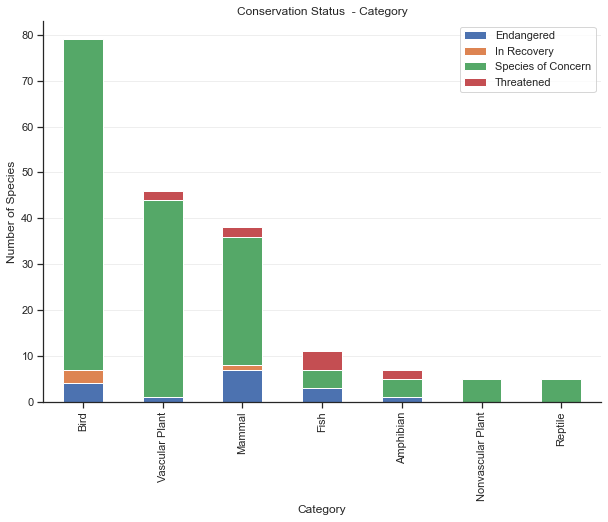

In [111]:
status_conserv.reindex(status_conserv.set_index('conservation_status')\
                .sum()\
                .sort_values(ascending=False)\
                .index, axis=1)\
                .T.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10,7))
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation Status  - Category")
plt.legend(status_conserv.conservation_status)
plt.xlabel("Category")
plt.ylabel("Number of Species")
sns.despine(left=False, bottom=False)
plt.show()

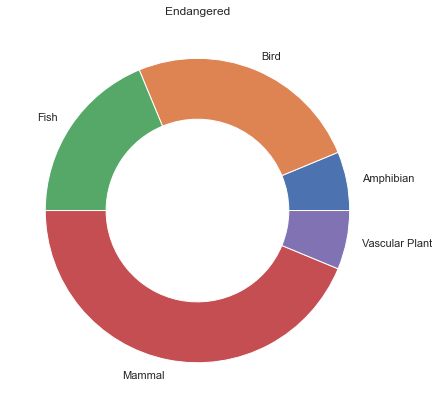

In [78]:
status = "Endangered"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       labels=labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

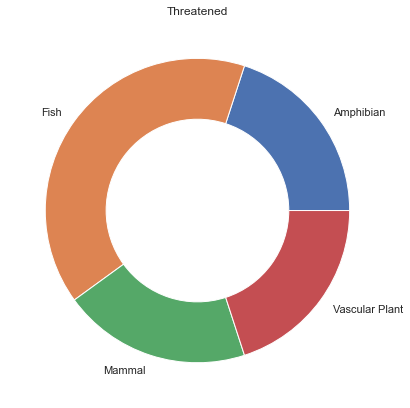

In [77]:
status = "Threatened"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       labels=labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

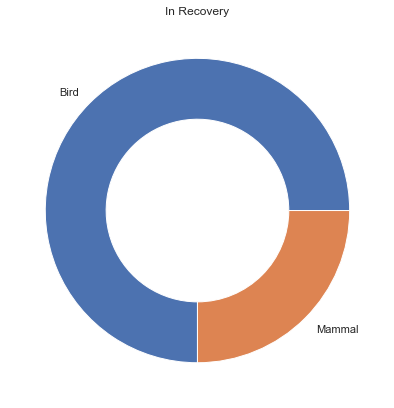

In [76]:
status = "In Recovery"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       labels=labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

--------------------
## Endangered & Threatened

In [139]:
endan_threat = df_spe[(df_spe.conservation_status == "Endangered") |
                    (df_spe.conservation_status == "Threatened")]
s_name = endan_threat.scientific_name.to_list()
endan_threat_obs = df_obs[df_obs.scientific_name.isin(s_name)]

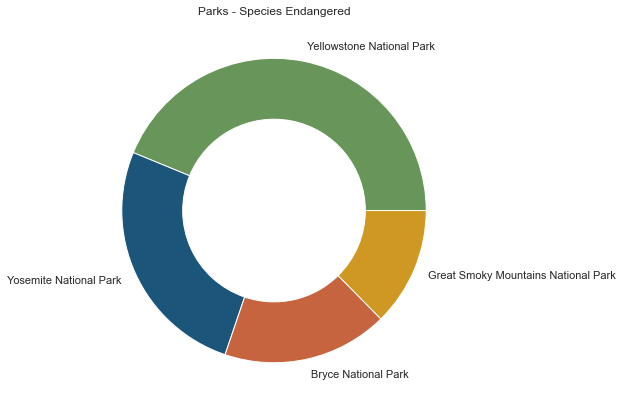

In [141]:
data = endan_threat_obs.groupby("park_name")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)

fig, ax = plt.subplots()
size = 0.4

ax.figure.set_size_inches(7,7)
ax.pie(data.observations, 
       radius=1,
       colors=["#68965a", "#1b567a", "#c76440", "#cf9823"],
       labels=data.index,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Parks - Species Endangered")
plt.show()

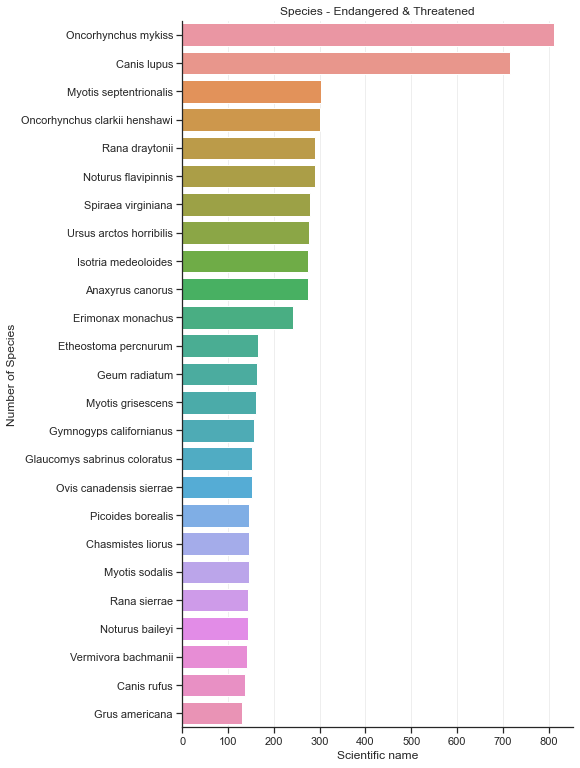

In [145]:
data = endan_threat_obs.groupby("scientific_name")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,13))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Species - Endangered & Threatened")
plt.xlabel("Scientific name")
plt.ylabel("Number of Species")

sns.despine(left=False, bottom=False)
plt.show()